In [1]:
import numpy as np
import matplotlib.pyplot as plt
import paco.processing.fullpaco as f_paco
import paco.processing.paco as p
from paco.util.util import *



In [11]:

fp = f_paco.FullPACO(patch_size=2)

Text(0.5, 1.0, '90 deg rotation')

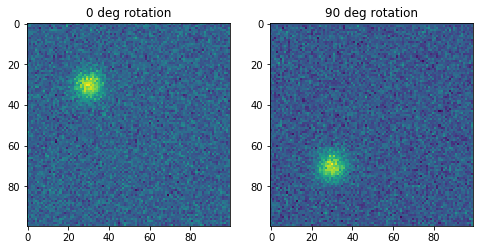

In [12]:
angles = np.array([0, 30, 45, 60, 90])
p0 = (30,30)
sigma = 0.5 # gaussian noise

mean = 0

images = [np.reshape(np.random.normal(mean, sigma, 10000), (100,100)) for j in range(len(angles))]

xx, yy = np.meshgrid(np.arange(-30, 70),np.arange(-30, 70))
s = gaussian2d(xx,yy,4, 5)
images_signal = [i + s for i in images]
rot_images = np.array([rotateImage(images_signal[j], angles[j]) for j in range(len(images_signal))])
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,6))
ax[0].imshow(rot_images[0])
ax[0].set_title("0 deg rotation")
ax[1].imshow(rot_images[-1])
ax[1].set_title("90 deg rotation")



In [13]:
fp.im_stack = rot_images
phi0s = np.array([[0,50]])
a,b,c = fp.PACO(angles)
#a,b= fp.PACO(phi0s,angles)

Running PACO...
0.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
Done


(100, 100)


/home/evert/.local/share/virtualenvs/PACO-L1lsUoAz/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


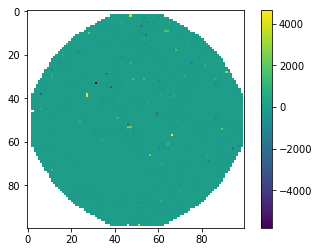

In [15]:
print(c.shape)

img = b/np.sqrt(a)
plt.imshow(b)
plt.colorbar()